In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import os
print(os.getcwd())



c:\Users\valen\Documents\Maestria\Analitica descriptiva\LAB-08-matplotlib-dashboard-vatamayog\homework


In [6]:
os.chdir("..")
print(os.getcwd())

c:\Users\valen\Documents\Maestria\Analitica descriptiva\LAB-08-matplotlib-dashboard-vatamayog


In [7]:
# carga de datos 

def load_data():
    df = pd.read_csv("files/input/shipping-data.csv")
    return df

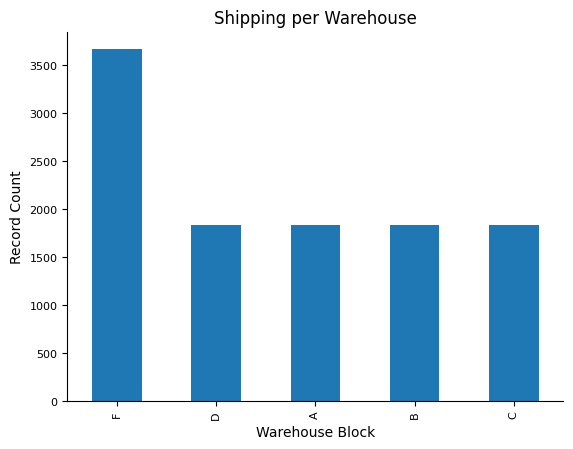

In [17]:
# visual for shipping data
os.makedirs("docs", exist_ok=True)

def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title="Shipping per Warehouse",
        xlabel="Warehouse Block",
        ylabel="Record Count",
        color="tab:blue",
        fontsize=8,
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("docs/shipping_per_warehouse.png")

df = load_data()
create_visual_for_shipping_per_warehouse(df)

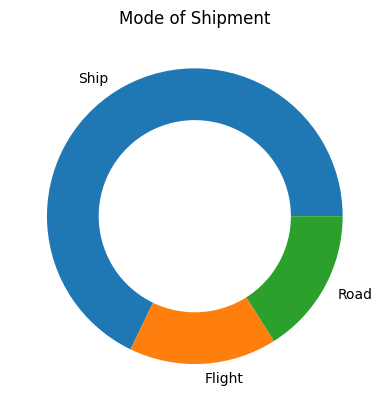

In [19]:
# visual for Mode of Shipment

def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title="Mode of Shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors=["tab:blue","tab:orange","tab:green"],
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("docs/mode_of_shipment.png")

df = load_data()
create_visual_for_mode_of_shipment(df)



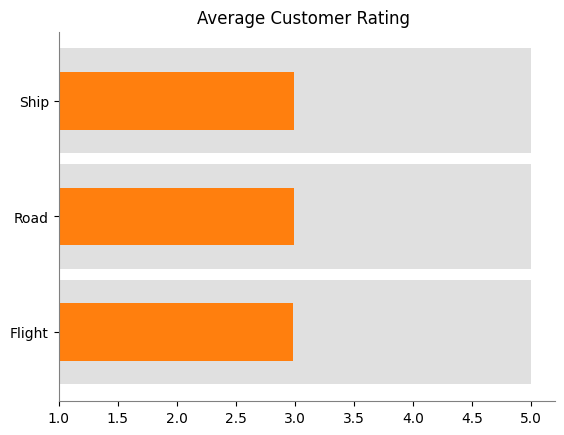

In [34]:
# visual for Average Customer Rating

def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
    df[['Mode_of_Shipment','Customer_rating']]
    .groupby('Mode_of_Shipment')
    .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[['mean','min','max']]
    plt.barh(
        y = df.index.values,
        width = df['max'].values-1,
        left = df['min'].values,
        height=0.9,
        color='lightgray',
        alpha=0.7,
    )
    colors = [
        'tab:green' if value >= 3.8 else 'tab:orange' for value in df['mean'].values
    ]
    plt.barh(
        y = df.index.values,
        width = df['mean'].values-1,
        left = df['min'].values,
        height=0.5,
        color=colors,
        alpha=1.0,
    )
    plt.title("Average Customer Rating ")
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("docs/average_customer_rating.png")

    
df = load_data()
create_visual_for_average_customer_rating(df)

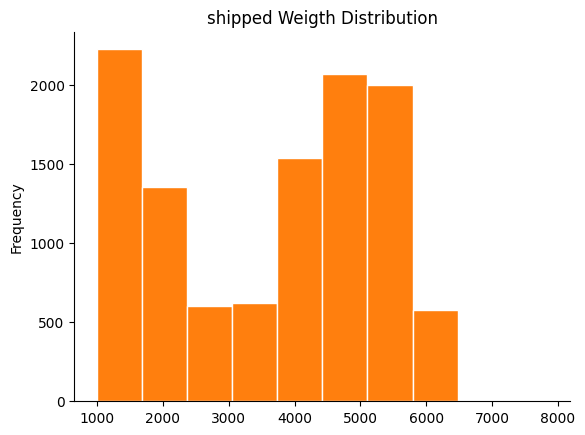

In [33]:
# visual for weight of distribution

def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title = "shipped Weigth Distribution",
        color ="tab:orange",
        edgecolor="white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("docs/weight_distribution.png")

df = load_data()
create_visual_for_weight_distribution(df)

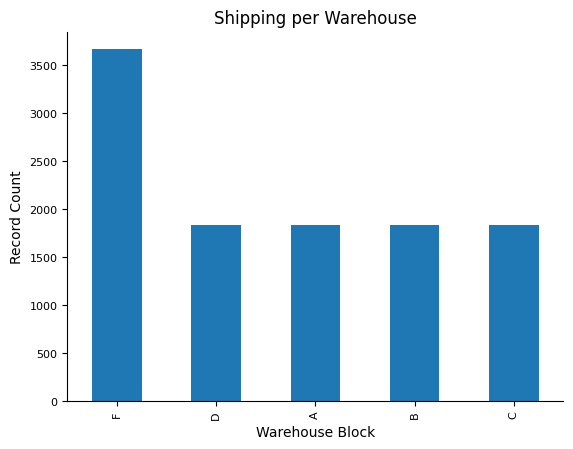

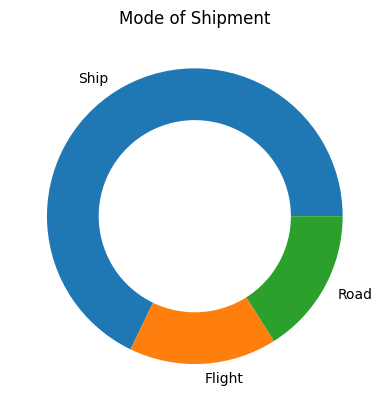

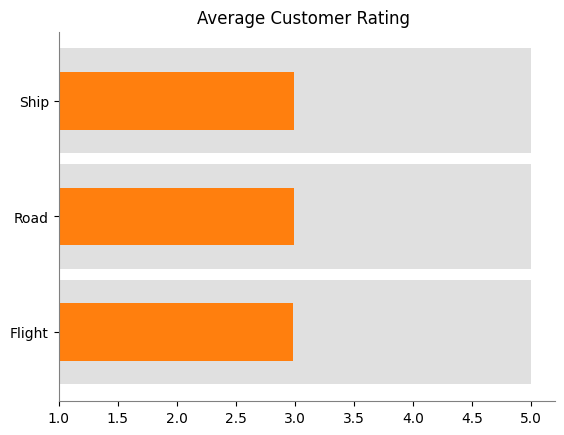

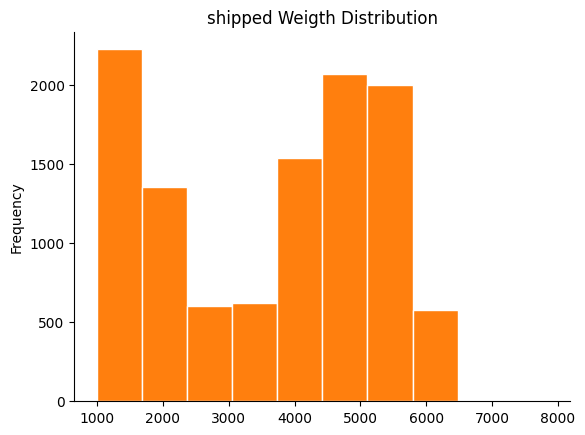

In [35]:
df = load_data()

create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)

In [37]:
%%writefile docs/index.html

<!DOCTYPE html>
<html>
  <body>
    <h1>Shipping Dashboard Example</h1>
    <div style="width:45%;float:left">
      <img src="shipping_per_warehouse.png" alt="Fig 1">
      <img src="mode_of_shipment.png" alt="Fig 2">
    </div>
    <div style="width:45%;float:left">
      <img src="average_customer_rating.png" alt="Fig 3">
      <img src="weight_distribution.png" alt="Fig 4">
    </div>
  </body>

Overwriting docs/index.html
